## Importing Libraries

In [147]:
from typing import List, Tuple
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

In [114]:
# Import dataframe
cervical_data = pd.read_csv('cervical_cancer_dataset.csv')
cervical_data.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


# Data Preprocessing


In [115]:
# Replace '?' with NaN
cervical_data = cervical_data.replace('?', np.nan)

In [116]:
cervical_data.isnull().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

In [117]:
# Drop the columns with too many missing values and
#the columns with a very low correlation with the target
cervical_data = cervical_data.drop(['STDs: Time since last diagnosis',
                   'STDs: Time since first diagnosis',
                   'STDs:cervical condylomatosis', 'STDs:AIDS', 'Smokes', 'IUD',
                   'Hormonal Contraceptives', 'Smokes (packs/year)'], axis=1)

cervical_data.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Hormonal Contraceptives (years),IUD (years),STDs,STDs (number),STDs:condylomatosis,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,37.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,15.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0


In [118]:
# Convert the object type to numeric type
cervical_data = cervical_data.apply(pd.to_numeric)

In [119]:
# Replace null values with mean
cervical_data = cervical_data.fillna(cervical_data.mean())

In [120]:
cervical_data.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Hormonal Contraceptives (years),IUD (years),STDs,STDs (number),STDs:condylomatosis,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,34,1.0,16.9953,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0000,4.0,37.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0000,4.0,0.0,15.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0


In [121]:
# New check for null values
cervical_data.isnull().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes (years)                        0
Hormonal Contraceptives (years)       0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0
STDs: Number of diagnosis             0
Dx:Cancer                             0
Dx:CIN                                0
Dx:HPV                                0
Dx                                    0
Hinselmann                            0


DATA VISUALIZATION

---



In [122]:
# Count cervical data where 'Biopsy' = 1
cervical_data['Biopsy'].value_counts()

0    803
1     55
Name: Biopsy, dtype: int64

In [123]:
# correlation matrix about 'Target' column
cervical_data.corr()['Biopsy']

Age                                   0.055956
Number of sexual partners            -0.001429
First sexual intercourse              0.007262
Num of pregnancies                    0.043460
Smokes (years)                        0.061484
Hormonal Contraceptives (years)       0.078995
IUD (years)                           0.032250
STDs                                  0.106737
STDs (number)                         0.096218
STDs:condylomatosis                   0.084520
STDs:vaginal condylomatosis          -0.019673
STDs:vulvo-perineal condylomatosis    0.086977
STDs:syphilis                        -0.042128
STDs:pelvic inflammatory disease     -0.009817
STDs:genital herpes                   0.129657
STDs:molluscum contagiosum           -0.009817
STDs:HIV                              0.124133
STDs:Hepatitis B                     -0.009817
STDs:HPV                             -0.013892
STDs: Number of diagnosis             0.097449
Dx:Cancer                             0.160905
Dx:CIN       

<Axes: >

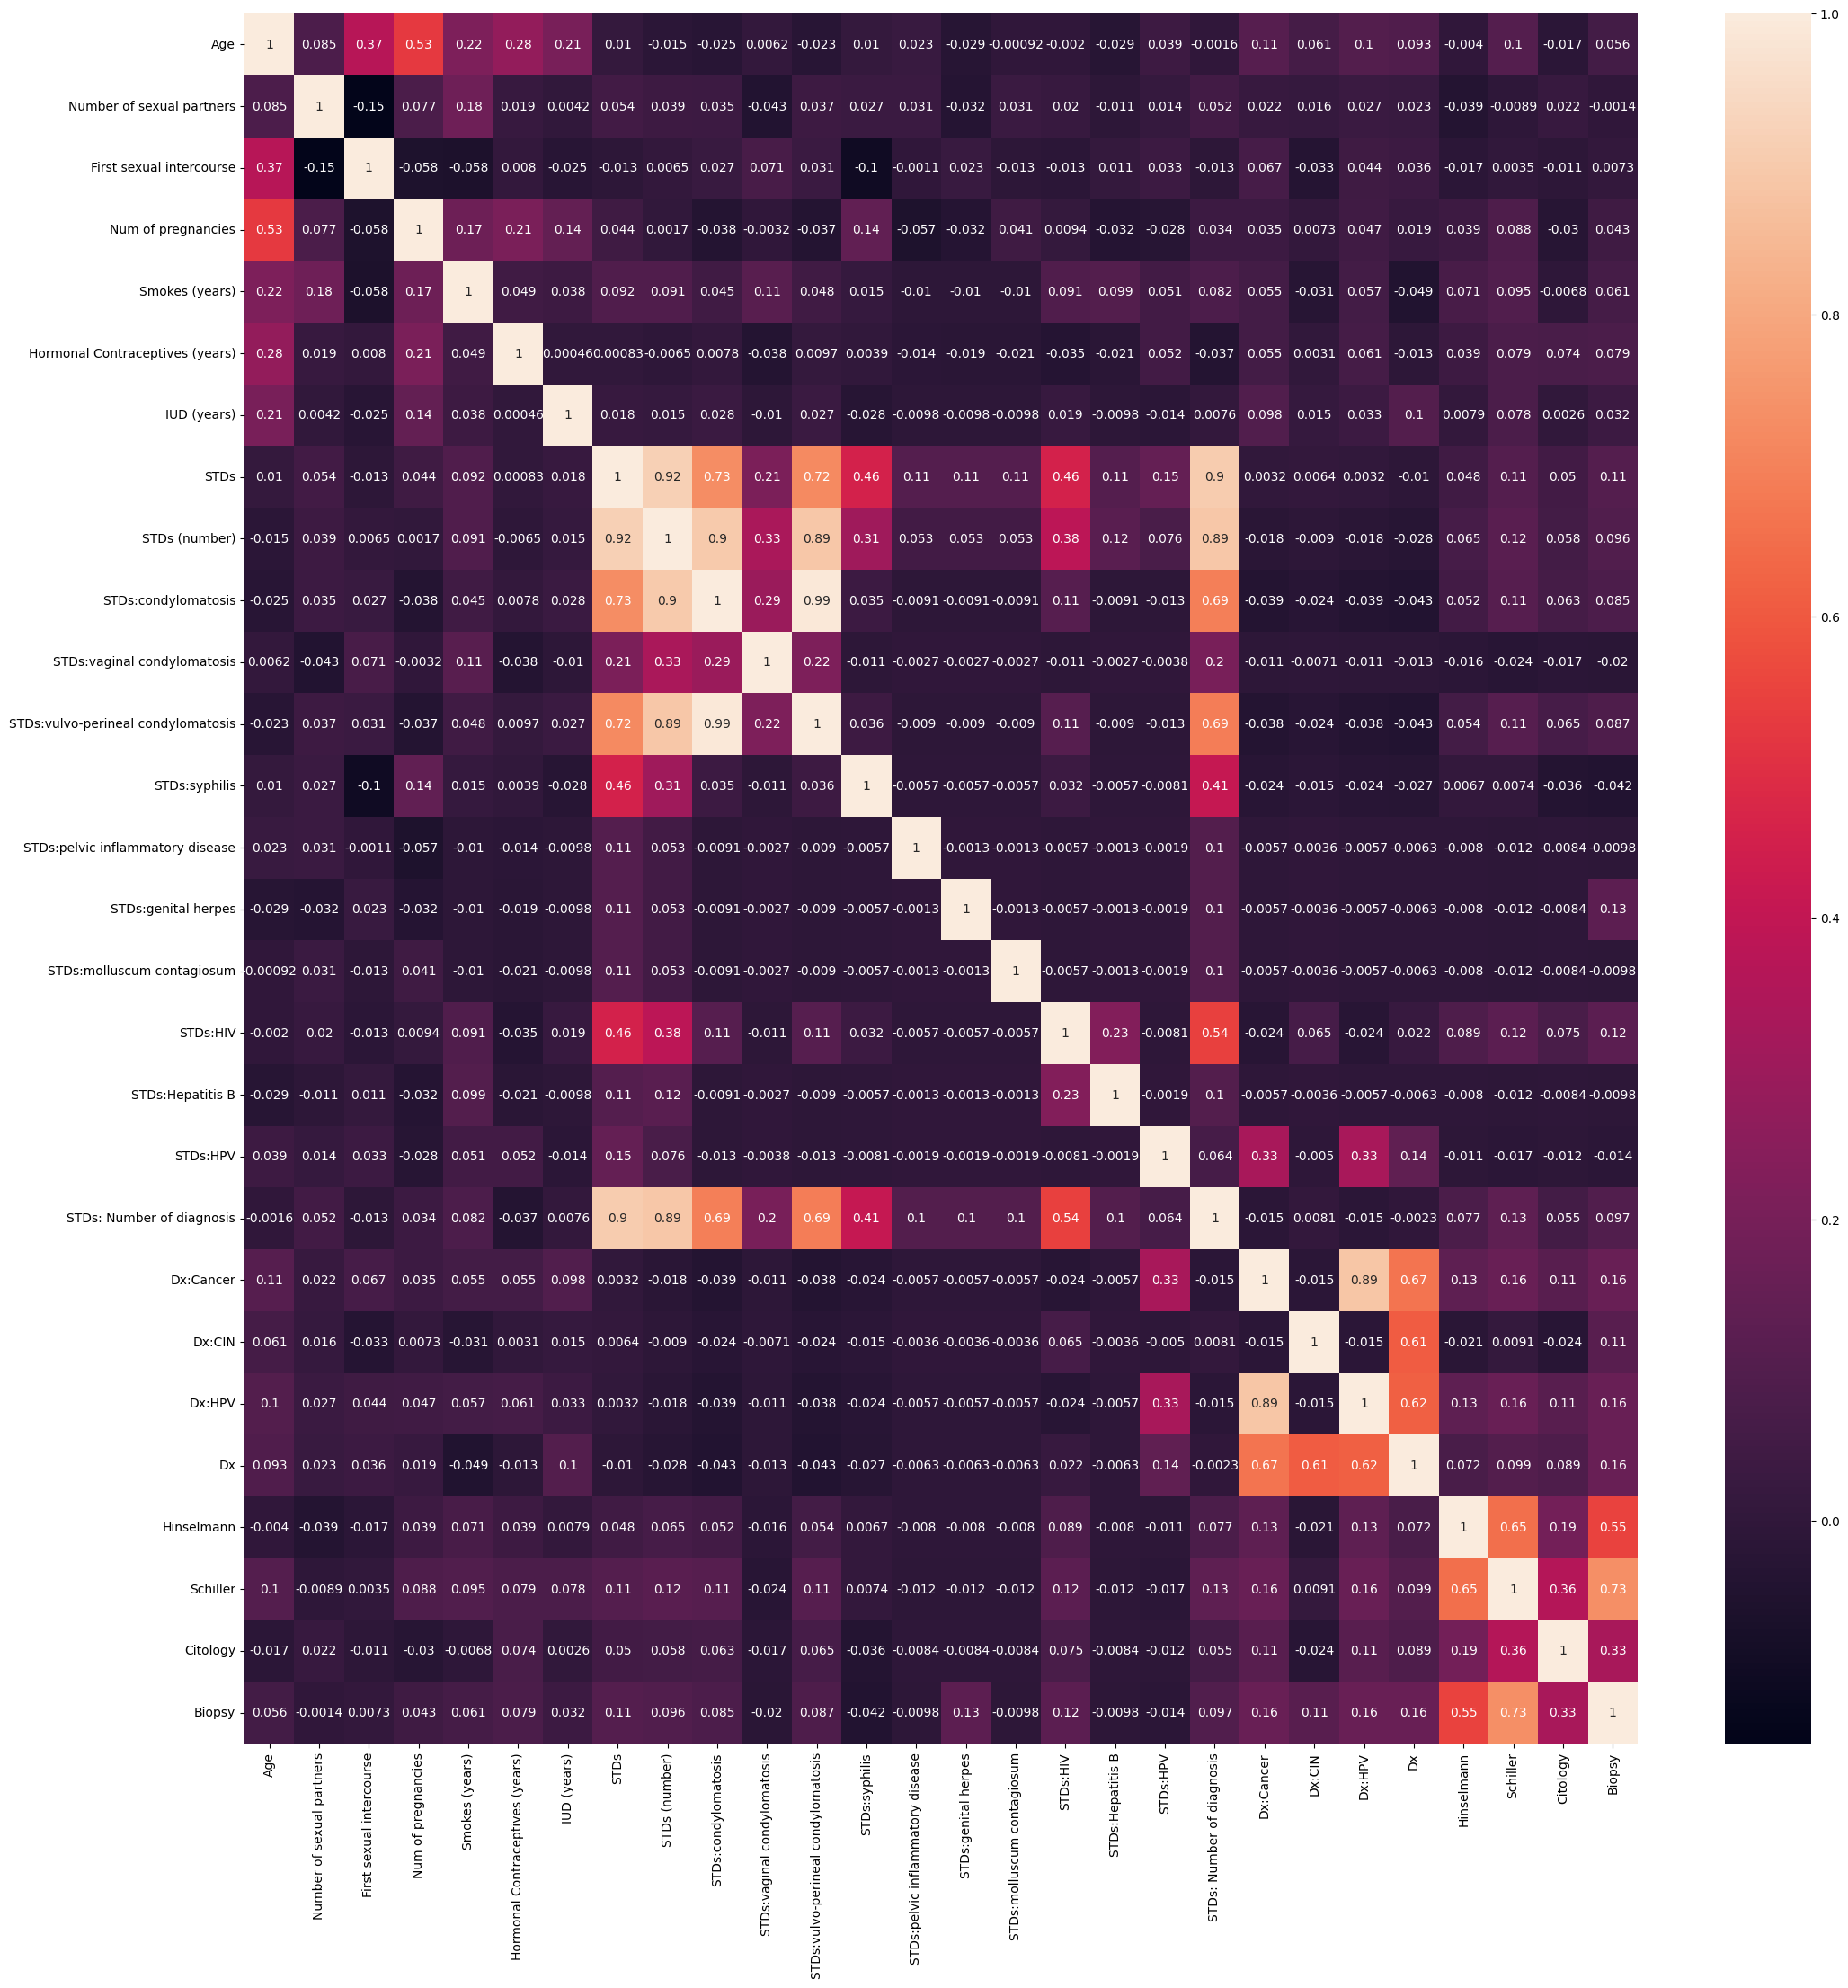

In [140]:
# plot correlation matrix
plt.figure(figsize=(25,25))
sns.heatmap(cervical_data.corr(), annot=True)

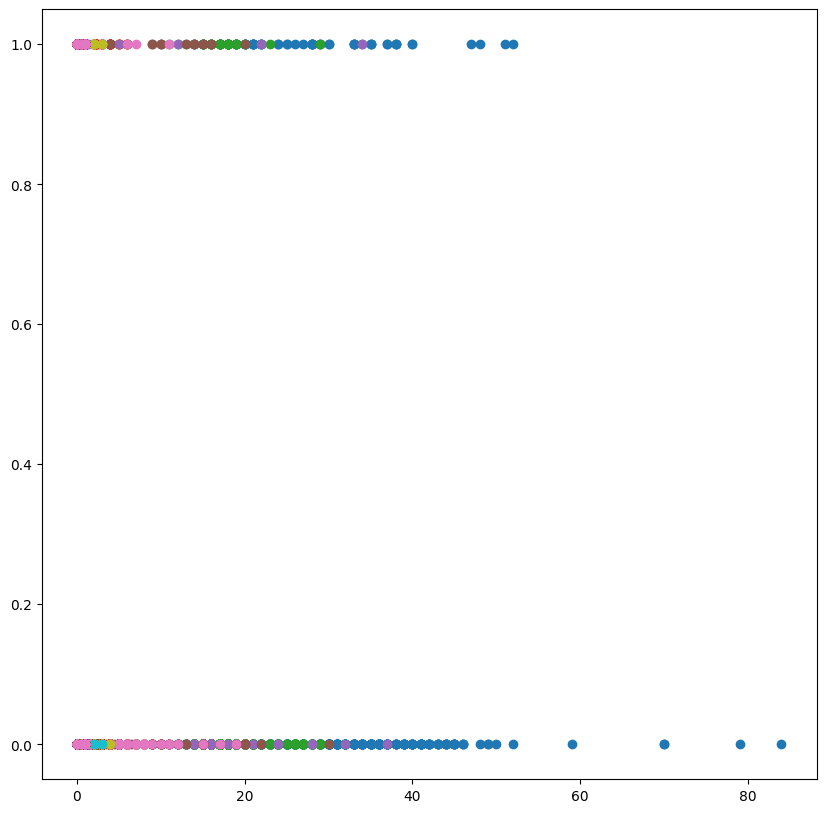

In [146]:
# scatter plot of 'Biopsy' and the features
plt.figure(figsize=(10,10))
for column in cervical_data:
    if column != 'Biopsy':
        plt.scatter(cervical_data[column], cervical_data['Biopsy'])

PREPROCESSING


In [126]:
# Set up the X and y variables
X = cervical_data.drop(['Biopsy'], axis=1)
y = cervical_data[['Biopsy']]

In [127]:
X = np.array(X).astype('float32')
y = np.array(y).astype('float32')

In [128]:
# Scaling the data whit MinMaxScaler beacouse the data distribution
scalar = MinMaxScaler()
X = scalar.fit_transform(X)

In [129]:
# Split the data into train, validate and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [130]:
X.shape

(858, 27)

# Trainingthe model

In [131]:
# Train the model
xgb = xgb.XGBClassifier()

#xgb = xgb.XGBClassifier(learning_rate=0.1, max_depth=20, n_estimators=50)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [132]:
accuracy_train = xgb.score(X_train, y_train)
accuracy_train

1.0

In [133]:
accuracy_test = xgb.score(X_test, y_test)
accuracy_test

0.9476744186046512

In [134]:
y_hat = xgb.predict(X_test)
type(y_hat)

numpy.ndarray

In [135]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97       161
         1.0       0.58      0.64      0.61        11

    accuracy                           0.95       172
   macro avg       0.78      0.80      0.79       172
weighted avg       0.95      0.95      0.95       172



In [136]:
cervical_1 = cervical_data[cervical_data['Biopsy'] == 1]
cervical_0 = cervical_data[cervical_data['Biopsy'] == 0]
cervical_1.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Hormonal Contraceptives (years),IUD (years),STDs,STDs (number),STDs:condylomatosis,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
6,51,3.0,17.0,6.000000,34.0,0.00,7.000000,0.0,0.0,0.0,...,0.0,0,0,0,0,0,1,1,0,1
22,40,1.0,18.0,1.000000,0.0,0.25,0.000000,1.0,2.0,1.0,...,0.0,1,0,0,0,0,0,1,1,1
23,40,1.0,20.0,2.000000,0.0,15.00,0.000000,0.0,0.0,0.0,...,0.0,0,1,0,1,0,1,1,0,1
41,37,2.0,18.0,2.275561,0.0,0.00,0.514804,1.0,1.0,0.0,...,0.0,1,0,1,0,1,0,1,0,1
44,37,3.0,19.0,3.000000,12.0,13.00,0.000000,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,1,0,1


In [137]:
t1 = cervical_1.drop(['Biopsy'], axis=1)
zero = 0
one = 0

for n in range(len(t1)):
    t = t1.iloc[n]
    t = np.array(t).astype('float32').reshape(1, -1)
    prediction = xgb.predict(t)
    if prediction[0] == 1:
        one += 1
    else:
        zero += 1

print(f"The count of the right prediction is {one} and the count of the wrong prediction is {zero}")

The count of the right prediction is 46 and the count of the wrong prediction is 9


<Axes: >

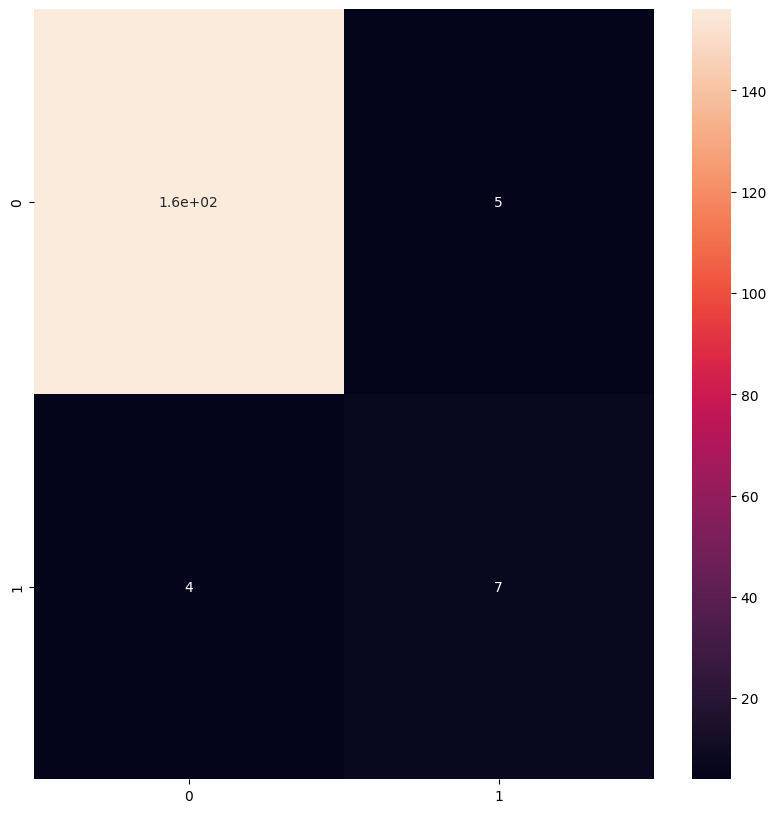

In [148]:
plt.figure(figsize=(10,10))

matrix = confusion_matrix(y_test, y_hat)
sns.heatmap(matrix, annot=True)